In [2]:

!pip install underthesea


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.4/978.4 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.3 MB/s eta 0:00:00


In [3]:
# =========================================================
# 1. IMPORT THƯ VIỆN CẦN THIẾT
# =========================================================
import pandas as pd
import re
from underthesea import word_tokenize
import string
from tqdm import tqdm

# =========================================================
# 2. ĐỌC FILE DỮ LIỆU
# =========================================================
# Thay path bằng đường dẫn thực tế của bạn
path = r"/content/drive/MyDrive/project2/project2a/dantri_crawl_full.csv"

data = pd.read_csv(path, encoding='utf-8')

# Chỉ giữ cột quan trọng (category và content)
data = data[['category', 'content']].dropna().reset_index(drop=True)

print("Dữ liệu gốc:", data.shape)
print(data.head(3))




Dữ liệu gốc: (7459, 2)
  category                                            content
0  Thời sự  Chiếc ô tô đang di chuyển bất ngờ bốc cháy ngù...
1  Thời sự  Khu vực Bắc Bộ duy trì trạng thái thời tiết mư...
2  Thời sự  Khoảng 17h40 ngày 11/10, một vụ cháy lớn xảy r...


In [4]:
# =========================================================
# 3. HÀM TIỀN XỬ LÝ MỘT ĐOẠN VĂN BẢN
# =========================================================
def clean_text(text):
    # 3.1 Chuyển thành chữ thường
    text = text.lower()

    # 3.2 Loại bỏ URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 3.3 Loại bỏ ký tự đặc biệt, số, emoji
    text = re.sub(r'[^a-zA-ZÀ-Ỹà-ỹ\s]', ' ', text)

    # 3.4 Loại bỏ nhiều khoảng trắng
    text = re.sub(r'\s+', ' ', text).strip()

    # 3.5 Tách từ (tokenization) bằng Underthesea
    text = word_tokenize(text, format="text")

    return text



In [5]:
# =========================================================
# 4. ÁP DỤNG HÀM LÊN CỘT CONTENT
# =========================================================
tqdm.pandas()
data["clean_text"] = data["content"].progress_apply(clean_text)




100%|██████████| 7459/7459 [07:44<00:00, 16.05it/s]


In [6]:
# =========================================================
# 5. LOẠI BỎ STOPWORDS (TỪ KHÔNG MANG NGHĨA)
# =========================================================
# Bạn có thể tự tạo file stopwords.txt hoặc dùng danh sách có sẵn
stopword_path = r"/content/drive/MyDrive/project2/project2a/vietnamese-stopwords.txt"

with open(stopword_path, "r", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

def remove_stopwords(text):
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords]
    return " ".join(tokens)

data["clean_text"] = data["clean_text"].apply(remove_stopwords)




In [7]:
import pandas as pd

# Giả sử cột 'content' chứa nội dung bài báo
print("Trước khi loại trùng:", len(data))

# Loại trùng hệt nhau
data = data.drop_duplicates(subset=["clean_text"], keep="first")

print("Sau khi loại trùng:", len(data))

Trước khi loại trùng: 7459
Sau khi loại trùng: 7309


In [8]:
import pandas as pd

# Giả sử dữ liệu nằm trong cột 'content'
print("Trước khi lọc:", len(data))

# Loại câu quá ngắn (< 8 từ)
data = data[data["clean_text"].apply(lambda x: len(str(x).split()) >= 8)]

print("Sau khi loại câu ngắn:", len(data))

Trước khi lọc: 7309
Sau khi loại câu ngắn: 7278


In [9]:

# =========================================================
# 6. LƯU FILE ĐÃ TIỀN XỬ LÝ
# =========================================================
output_path = r"/content/drive/MyDrive/project2/project2a/dantri_preprocessed.csv"
data.to_csv(output_path, index=False, encoding='utf-8-sig')

print("Đã tiền xử lý xong và lưu tại:", output_path)


Đã tiền xử lý xong và lưu tại: /content/drive/MyDrive/project2/project2a/dantri_preprocessed.csv


🔍 So sánh dữ liệu trước và sau khi tiền xử lý:

Bài 1:
Trước xử lý:
Chiếc ô tô đang di chuyển bất ngờ bốc cháy ngùn ngụt giữa đường tại đoạn đối diện số 29 đường Nguyễn Hoàng (phường Từ Liêm, TP Hà Nội), khoảng 20h40 ngày 11/10.
Thời gian trên, ô tô hiệu Mercedes đang di chuyển trên đường Nguyễn Hoàng, phần đầu xe bốc cháy. Nhiều người dân đi đường ngay lập tức gọi 
Sau xử lý:
ô_tô di_chuyển bất_ngờ bốc cháy ngùn_ngụt đường đoạn đối_diện đường nguyễn_hoàng_phường từ_liêm tp hà_nội h thời_gian ô_tô_hiệu mercedes di_chuyển đường nguyễn_hoàng_phần đầu xe bốc cháy người_dân đi đường ngay_lập_tức gọi điện_báo lực_lượng chức_năng ô_tô mercedes bốc cháy ngùn_ngụt đường nguyễn_hoàng_ảnh cắt clip thông_tin phóng viêndân_trí chỉ_huy đội csgt đường_bộ phòng csgt công_an tp hà_nội phút đám cháy dập tắt hoàn_toàn may vụ_việc thiệt_hại báo đội csgt đường_bộ cử cán_bộ hiện_trường phân_luồng giao_thông phối_hợp cảnh_sát pccc cnch dập lửa cảnh_sát pccc khống_chế vụ cháy mercedes hư_hỏng ảnh minh_loan h

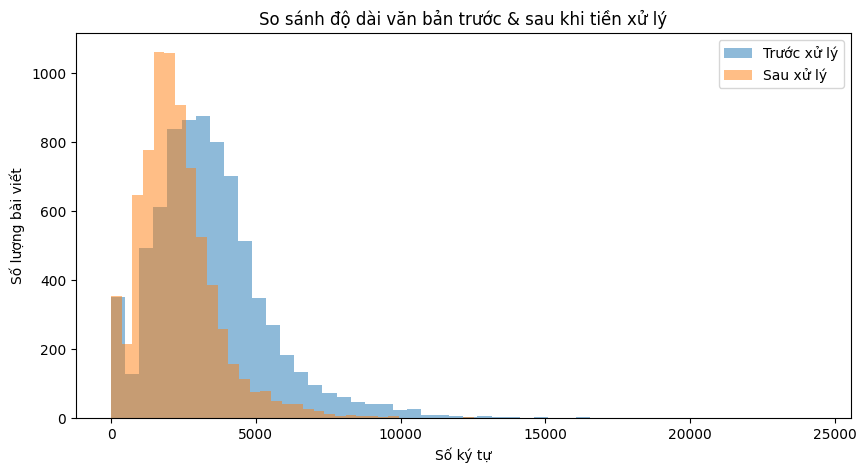

In [10]:
# =========================================================
# 1. IMPORT THƯ VIỆN
# =========================================================
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# =========================================================
# 2. ĐỌC FILE TRƯỚC & SAU KHI XỬ LÝ
# =========================================================
# (Thay đường dẫn bằng file thật của bạn)
path_raw = r"/content/drive/MyDrive/project2/project2a/dantri_crawl_full.csv"
path_clean = r"/content/drive/MyDrive/project2/project2a/dantri_preprocessed.csv"

data_raw = pd.read_csv(path_raw, encoding="utf-8")
data_clean = pd.read_csv(path_clean, encoding="utf-8")

# Đảm bảo chỉ so sánh cùng thứ tự (nếu cần, join theo index)
data_compare = data_raw[['content']].copy()
data_compare['clean_text'] = data_clean['clean_text']

# =========================================================
# 3. HIỂN THỊ MỘT SỐ DÒNG SO SÁNH TRỰC TIẾP
# =========================================================
print("🔍 So sánh dữ liệu trước và sau khi tiền xử lý:\n")
for i in range(5):
    print(f"Bài {i+1}:")
    print("Trước xử lý:")
    print(data_compare['content'][i][:300])  # hiển thị tối đa 300 ký tự
    print("Sau xử lý:")
    print(data_compare['clean_text'][i])
    print("-" * 80)

# =========================================================
# 4. SO SÁNH ĐỘ DÀI TRUNG BÌNH CỦA VĂN BẢN
# =========================================================
data_compare["len_raw"] = data_compare["content"].astype(str).apply(len)
data_compare["len_clean"] = data_compare["clean_text"].astype(str).apply(len)

print("Độ dài trung bình (ký tự):")
print("Trước xử lý:", round(data_compare["len_raw"].mean(), 2))
print("Sau xử lý:", round(data_compare["len_clean"].mean(), 2))

# =========================================================
# 5. TRỰC QUAN HÓA PHÂN BỐ ĐỘ DÀI TRƯỚC & SAU
# =========================================================
plt.figure(figsize=(10, 5))
plt.hist(data_compare["len_raw"], bins=50, alpha=0.5, label="Trước xử lý")
plt.hist(data_compare["len_clean"], bins=50, alpha=0.5, label="Sau xử lý")
plt.title("So sánh độ dài văn bản trước & sau khi tiền xử lý")
plt.xlabel("Số ký tự")
plt.ylabel("Số lượng bài viết")
plt.legend()
plt.show()
